# Forest Cover Prediction
The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The 
data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

The goal of the Project is to predict seven different cover types in four different wilderness areas of the Roosevelt National Forest of Northern Colorado with the best accuracy.

### Columns Description:
**1. Elevation** - Elevation in meters

**2. Aspect** - Aspect in degrees azimuth

**3. Slope** - Slope in degrees

**4. Horizontal_Distance_To_Hydrology** - Horz Dist to nearest surface water features 

**5. Vertical_Distance_To_Hydrology** - Vert Dist to nearest surface water features 

**6. Horizontal_Distance_To_Roadways** - Horz Dist to nearest roadway 

**7. Hillshade_9am (0 to 255 index)** - Hillshade index at 9am, summer solstice 

**8. Hillshade_Noon (0 to 255 index)** - Hillshade index at noon, summer solstice 

**9. Hillshade_3pm (0 to 255 index)** - Hillshade index at 3pm, summer solstice 

**10. Horizontal_Distance_To_Fire_Points** - Horz Dist to nearest wildfire ignition points 

**11. Wilderness_Area (4 binary columns, 0 = absence or 1 = presence)** - Wilderness area designation
   
    1. Rawah Wilderness Area
    2. Neota Wilderness Area
    3. Comanche Peak Wilderness Area
    4. Cache la Poudre Wilderness Area

**12. Soil_Type (40 binary columns, 0 = absence or 1 = presence)** - Soil Type designation 

    1. Cathedral family - Rock outcrop complex, extremely stony.
    2. Vanet - Ratake families complex, very stony.
    3. Haploborolis - Rock outcrop complex, rubbly.
    4. Ratake family - Rock outcrop complex, rubbly.
    5. Vanet family - Rock outcrop complex complex, rubbly.
    6. Vanet - Wetmore families - Rock outcrop complex, stony.
    7. Gothic family.
    8. Supervisor - Limber families complex.
    9. Troutville family, very stony.
    10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
    11. Bullwark - Catamount families - Rock land complex, rubbly.
    12. Legault family - Rock land complex, stony.
    13. Catamount family - Rock land - Bullwark family complex, rubbly.
    14. Pachic Argiborolis - Aquolis complex.
    15. unspecified in the USFS Soil and ELU Survey.
    16. Cryaquolis - Cryoborolis complex.
    17. Gateview family - Cryaquolis complex.
    18. Rogert family, very stony.
    19. Typic Cryaquolis - Borohemists complex.
    20. Typic Cryaquepts - Typic Cryaquolls complex.
    21. Typic Cryaquolls - Leighcan family, till substratum complex.
    22. Leighcan family, till substratum, extremely bouldery.
    23. Leighcan family, till substratum - Typic Cryaquolls complex.
    24. Leighcan family, extremely stony.
    25. Leighcan family, warm, extremely stony.
    26. Granile - Catamount families complex, very stony.
    27. Leighcan family, warm - Rock outcrop complex, extremely stony.
    28. Leighcan family - Rock outcrop complex, extremely stony.
    29. Como - Legault families complex, extremely stony.
    30. Como family - Rock land - Legault family complex, extremely stony.
    31. Leighcan - Catamount families complex, extremely stony.
    32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
    33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
    34. Cryorthents - Rock land complex, extremely stony.
    35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
    36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
    37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
    38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
    39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
    40. Moran family - Cryorthents - Rock land complex, extremely stony.
    
**13. Cover_Type (7 types, integers 1 to 7)** - Forest Cover Type designation

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore")

# Loading the Data

In [2]:
forest_df = pd.read_csv("train.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
print(forest_df.shape)

forest_df.head()

(15120, 56)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [5]:
forest_df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [6]:
# Drop unnecessary columns
forest_df.drop(['Id'], axis=1, inplace=True)

forest_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [7]:
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

In [8]:
forest_df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.00000

In [9]:
forest_df.nunique()

Elevation                             1665
Aspect                                 361
Slope                                   52
Horizontal_Distance_To_Hydrology       400
Vertical_Distance_To_Hydrology         423
Horizontal_Distance_To_Roadways       3250
Hillshade_9am                          176
Hillshade_Noon                         141
Hillshade_3pm                          247
Horizontal_Distance_To_Fire_Points    2710
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               1
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

In [10]:
forest_df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


# Exploratory Data Analysis

> ### Univariate Analysis

In [11]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [12]:
numerical_univariate_analysis(forest_df)

********** Elevation **********
min       1863.000000
max       3849.000000
mean      2749.322553
median    2752.000000
std        417.678187
Name: Elevation, dtype: float64

********** Aspect **********
min         0.000000
max       360.000000
mean      156.676653
median    126.000000
std       110.085801
Name: Aspect, dtype: float64

********** Slope **********
min        0.000000
max       52.000000
mean      16.501587
median    15.000000
std        8.453927
Name: Slope, dtype: float64

********** Horizontal_Distance_To_Hydrology **********
min          0.000000
max       1343.000000
mean       227.195701
median     180.000000
std        210.075296
Name: Horizontal_Distance_To_Hydrology, dtype: float64

********** Vertical_Distance_To_Hydrology **********
min      -146.000000
max       554.000000
mean       51.076521
median     32.000000
std        61.239406
Name: Vertical_Distance_To_Hydrology, dtype: float64

********** Horizontal_Distance_To_Roadways **********
min          0.00

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<A

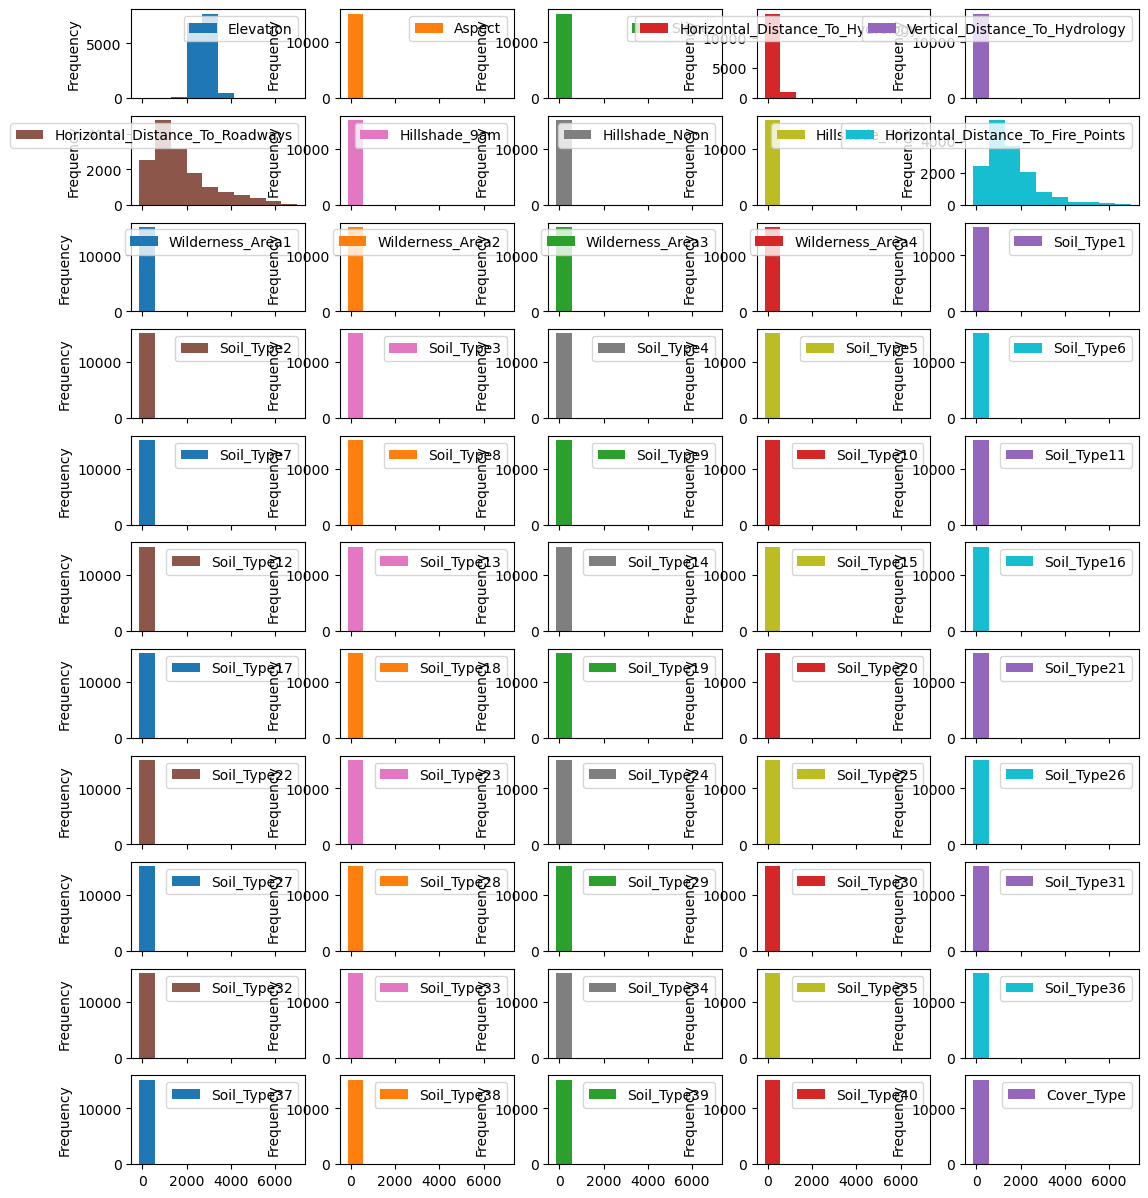

In [13]:
forest_df.plot(kind='hist', subplots=True, layout=(11, 5), figsize=(13, 15))

Elevation                                Axes(0.125,0.820769;0.133621x0.0592308)
Aspect                                Axes(0.285345,0.820769;0.133621x0.0592308)
Slope                                  Axes(0.44569,0.820769;0.133621x0.0592308)
Horizontal_Distance_To_Hydrology      Axes(0.606034,0.820769;0.133621x0.0592308)
Vertical_Distance_To_Hydrology        Axes(0.766379,0.820769;0.133621x0.0592308)
Horizontal_Distance_To_Roadways          Axes(0.125,0.749692;0.133621x0.0592308)
Hillshade_9am                         Axes(0.285345,0.749692;0.133621x0.0592308)
Hillshade_Noon                         Axes(0.44569,0.749692;0.133621x0.0592308)
Hillshade_3pm                         Axes(0.606034,0.749692;0.133621x0.0592308)
Horizontal_Distance_To_Fire_Points    Axes(0.766379,0.749692;0.133621x0.0592308)
Wilderness_Area1                         Axes(0.125,0.678615;0.133621x0.0592308)
Wilderness_Area2                      Axes(0.285345,0.678615;0.133621x0.0592308)
Wilderness_Area3            

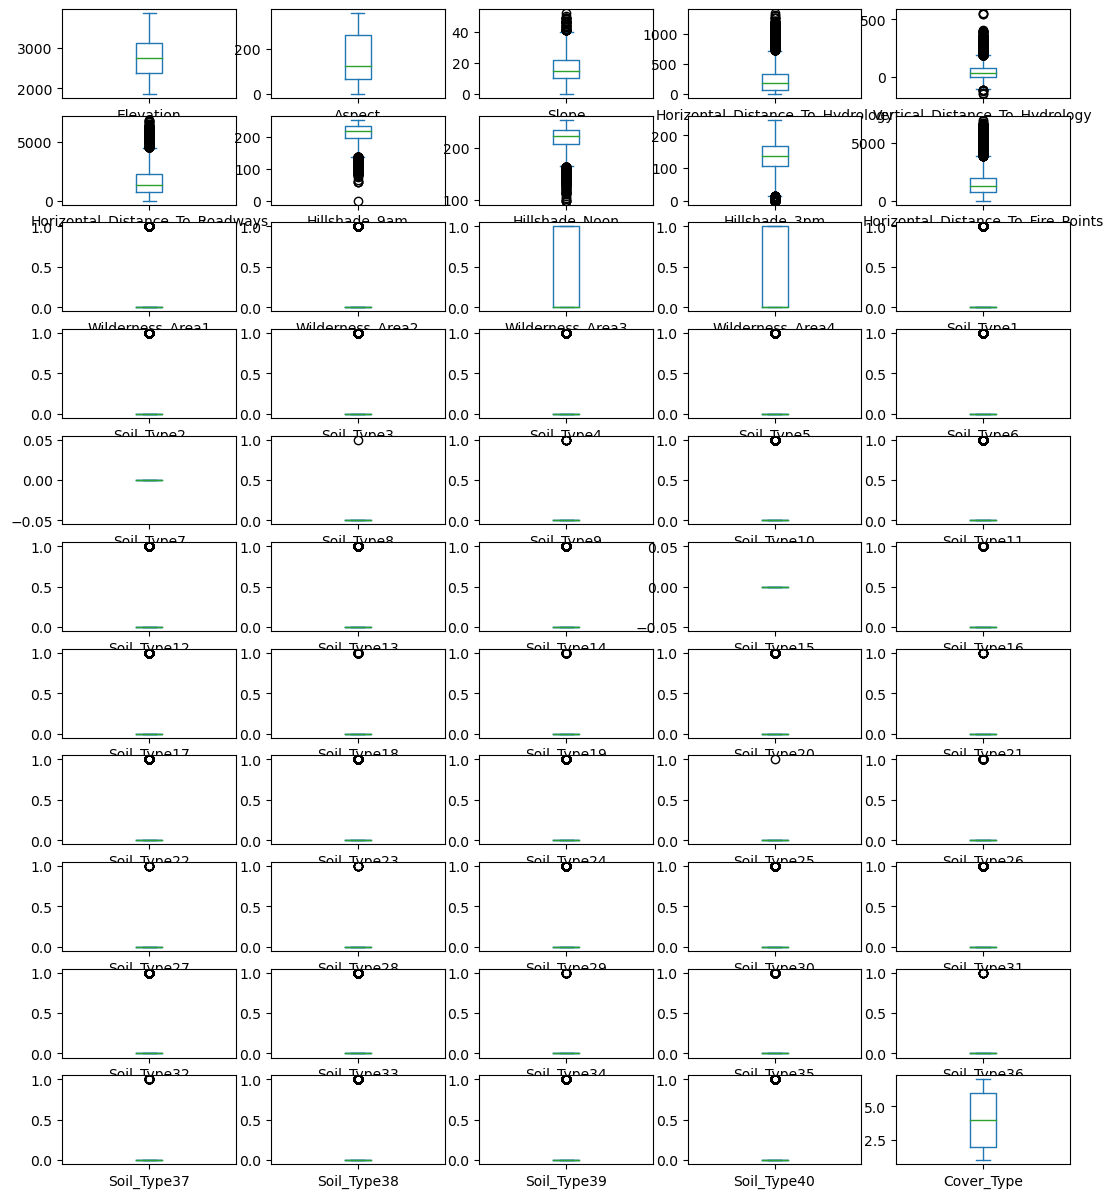

In [14]:
forest_df.plot(kind='box', subplots=True, layout=(11, 5), figsize=(13, 15))

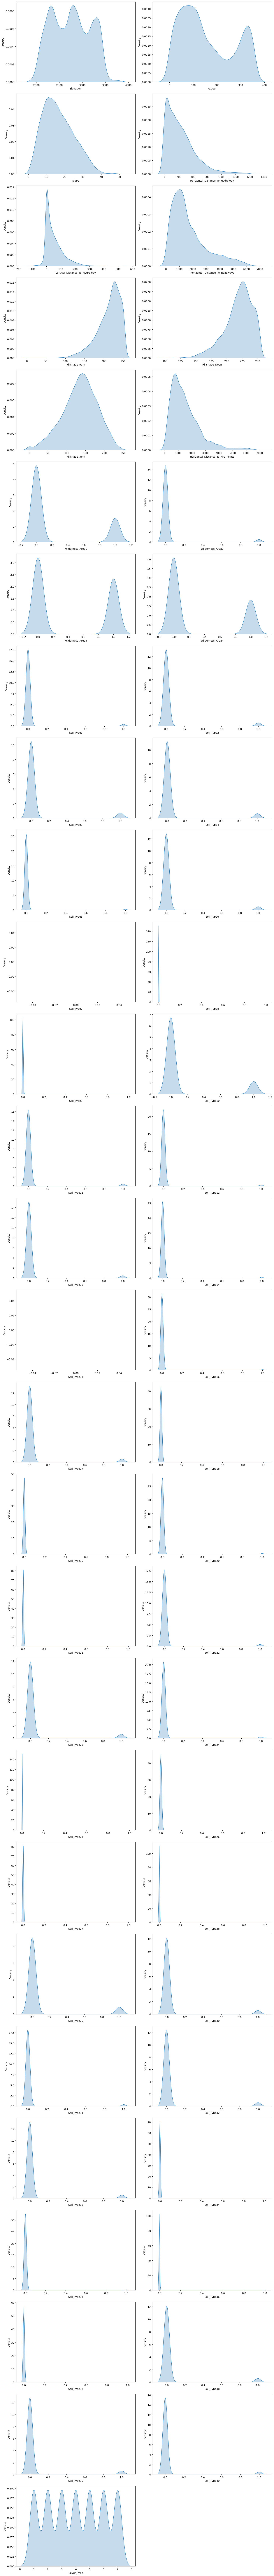

In [15]:
# Set up the subplot grid
num_plots = len(forest_df.columns)
num_cols = 2
num_rows = (num_plots + 1) // num_cols
plt.figure(figsize=(15, 5*num_rows))

# Loop through each categorical column and create a countplot
for i, col in enumerate(forest_df.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(data=forest_df, x=col, shade=True)

plt.tight_layout()
plt.show()

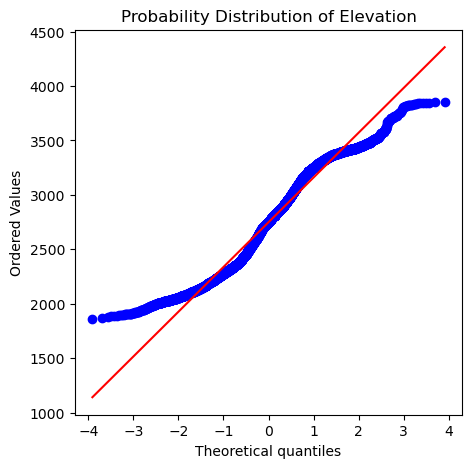

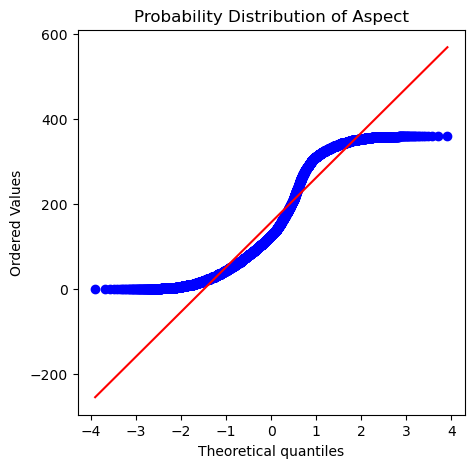

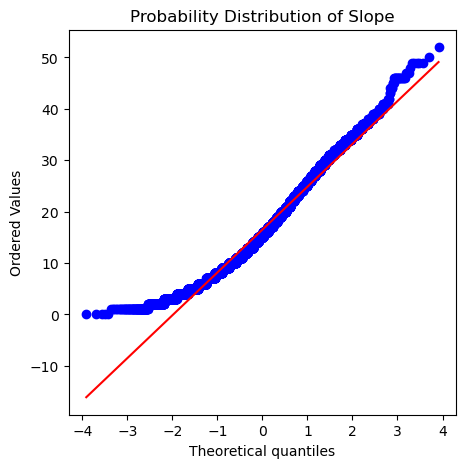

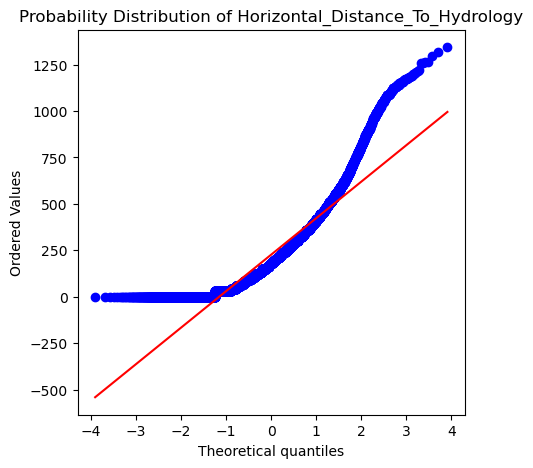

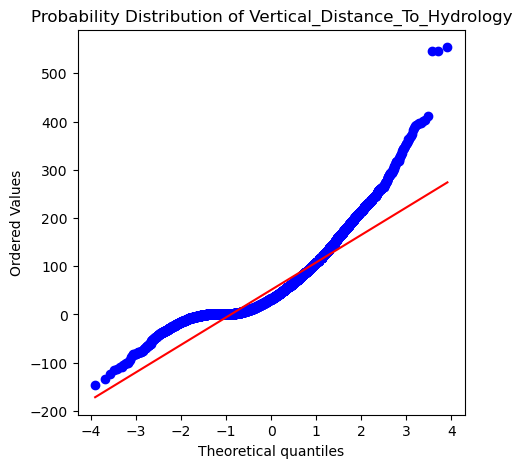

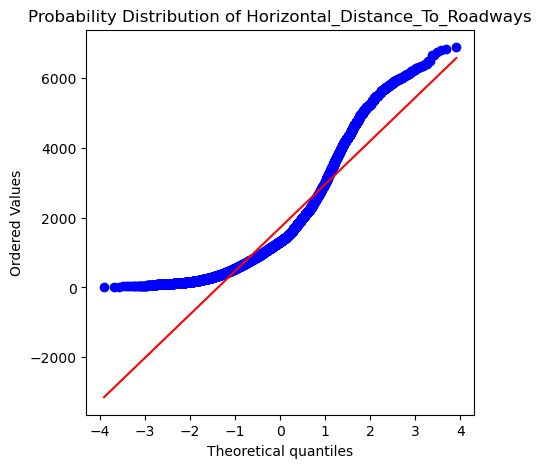

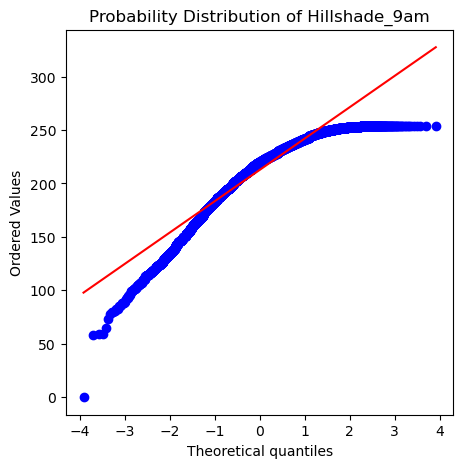

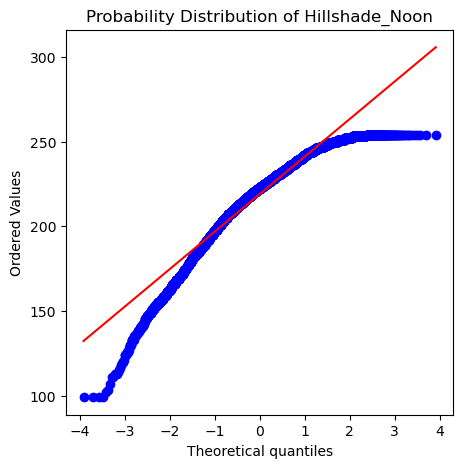

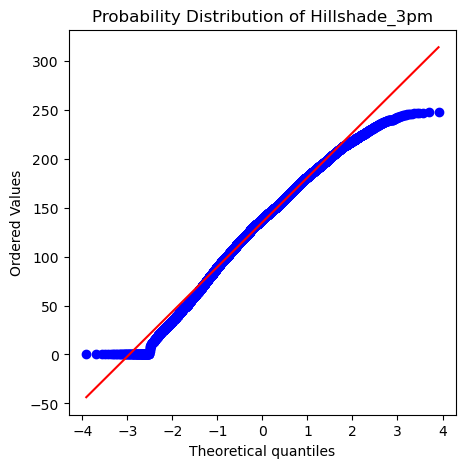

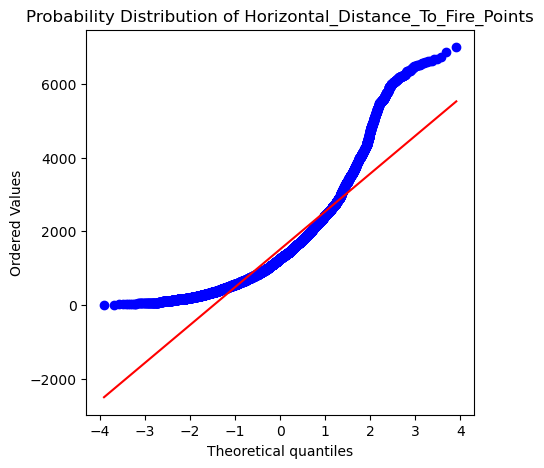

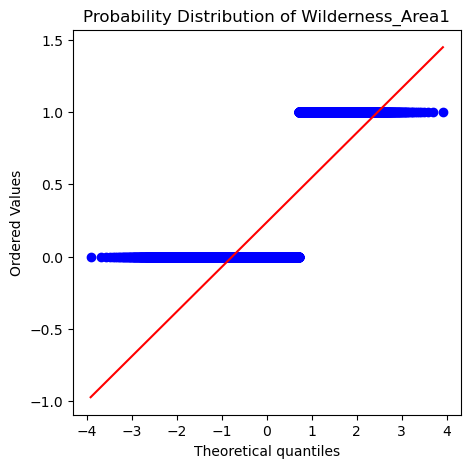

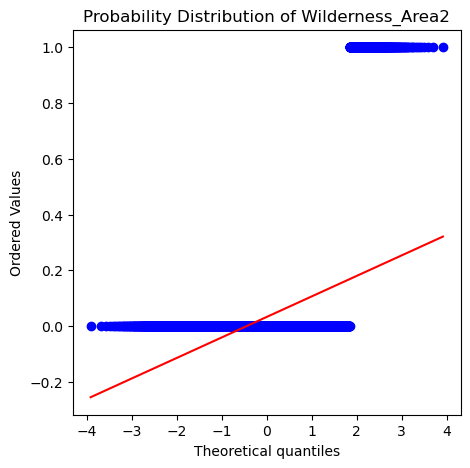

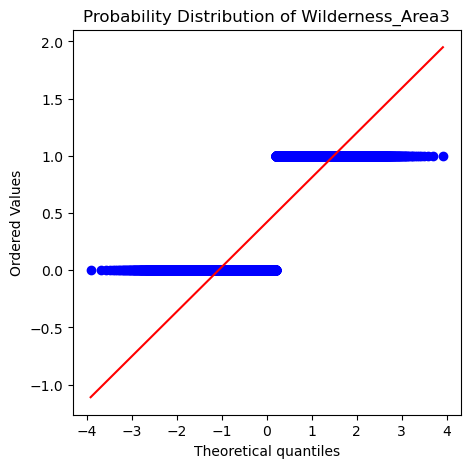

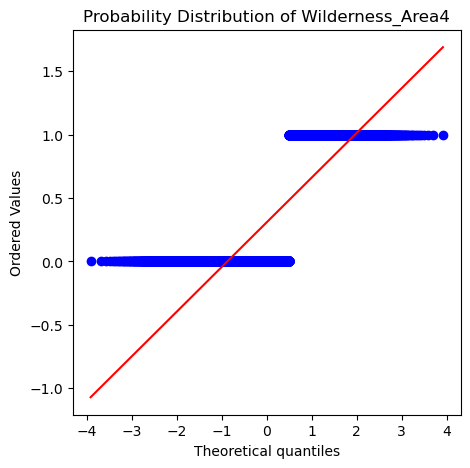

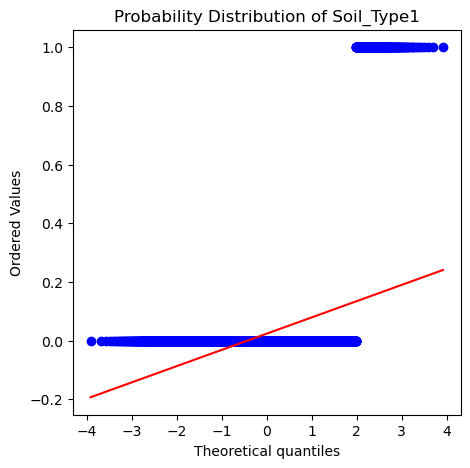

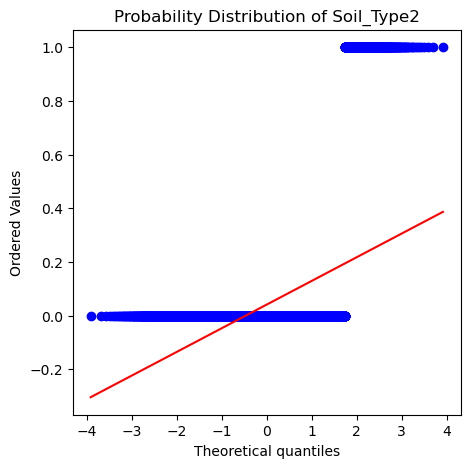

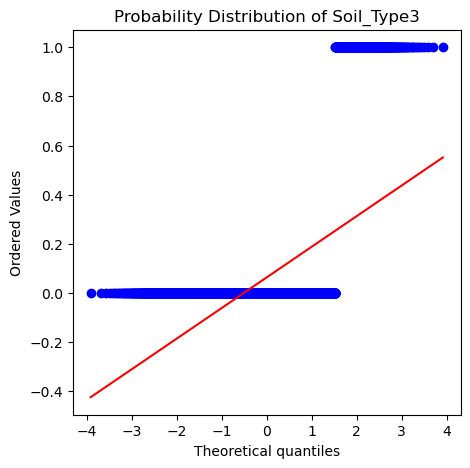

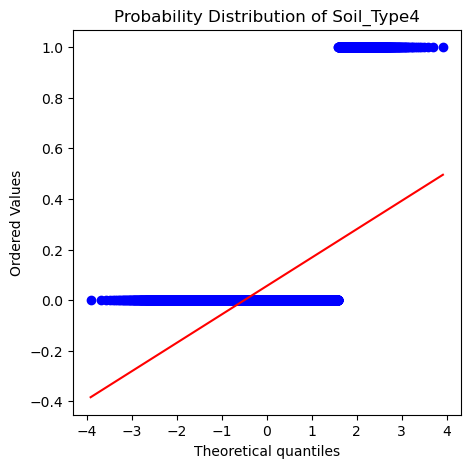

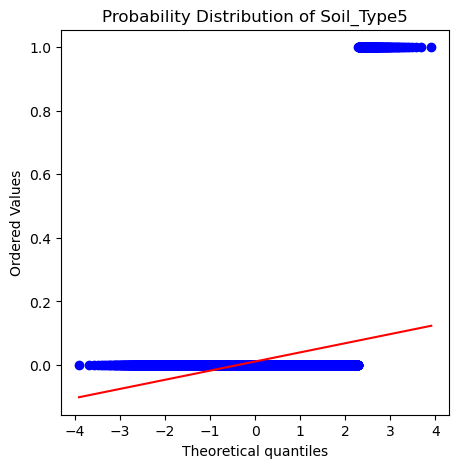

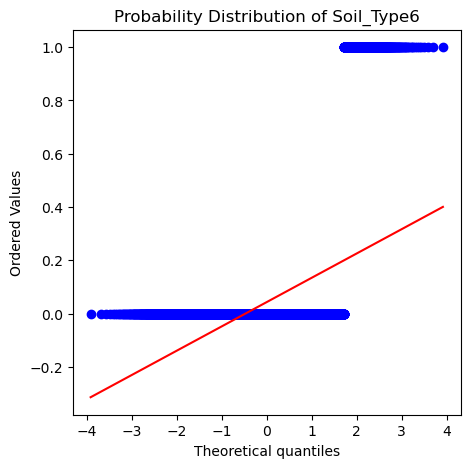

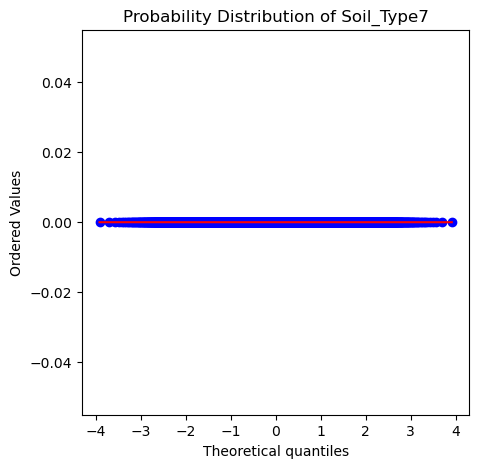

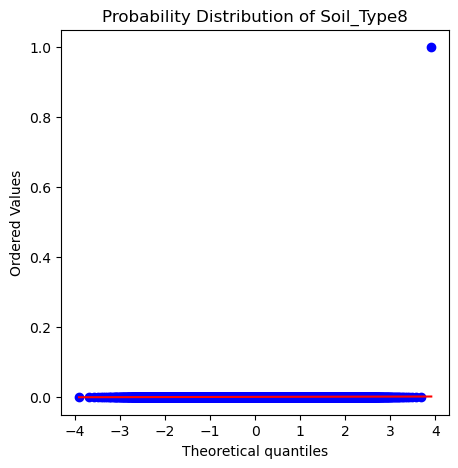

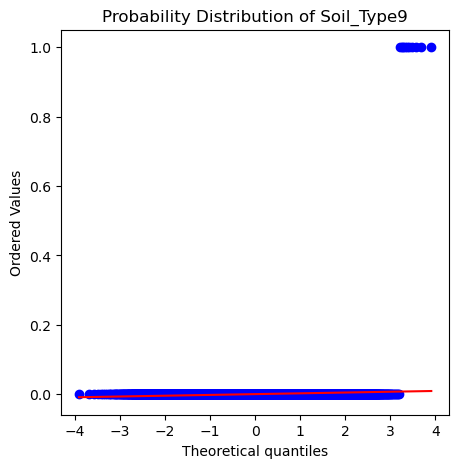

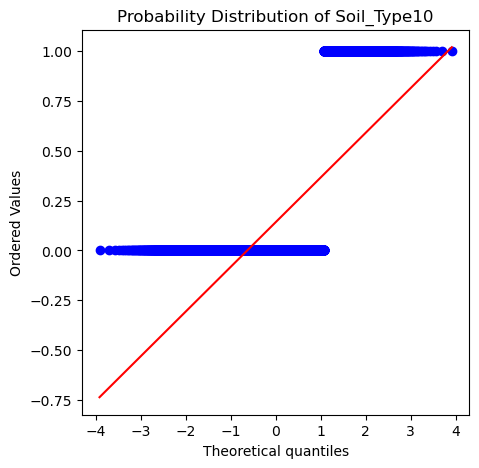

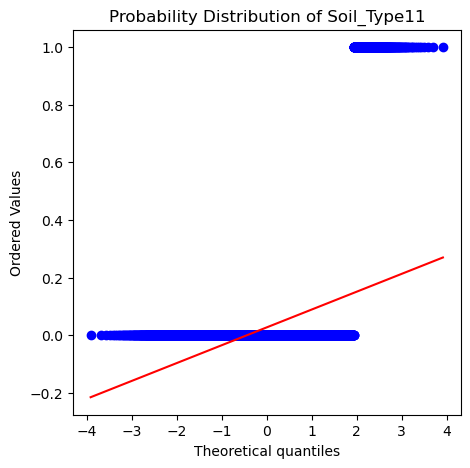

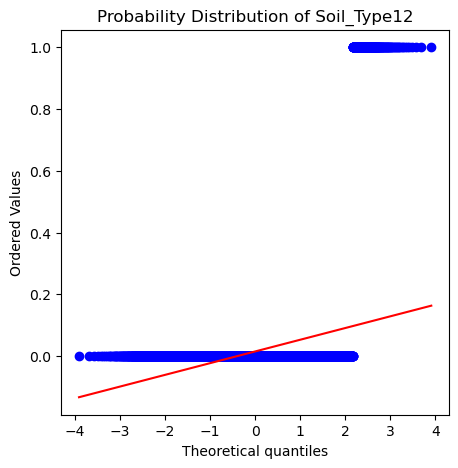

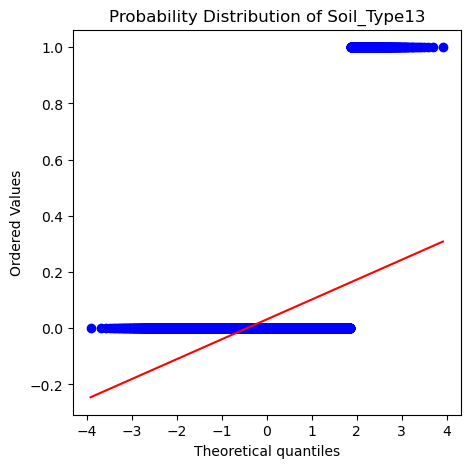

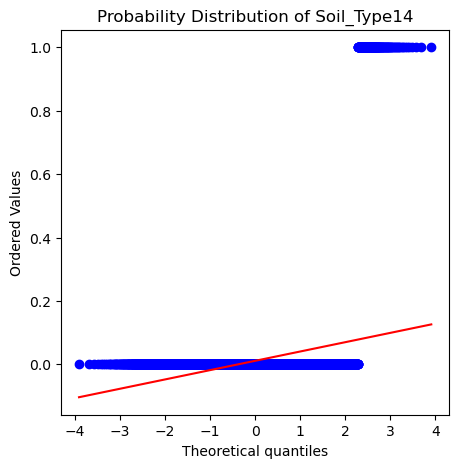

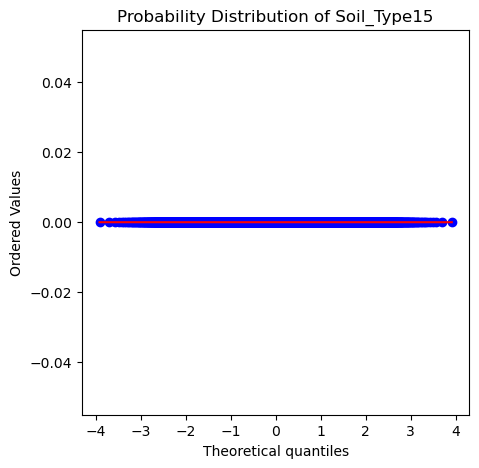

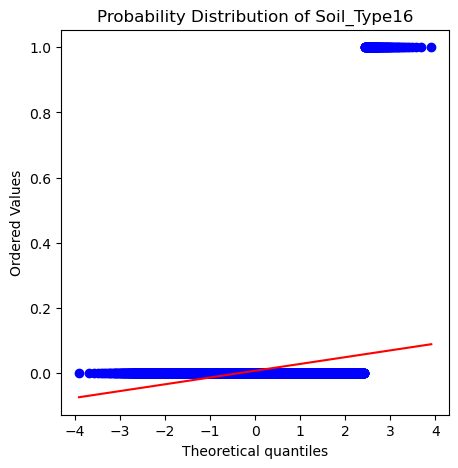

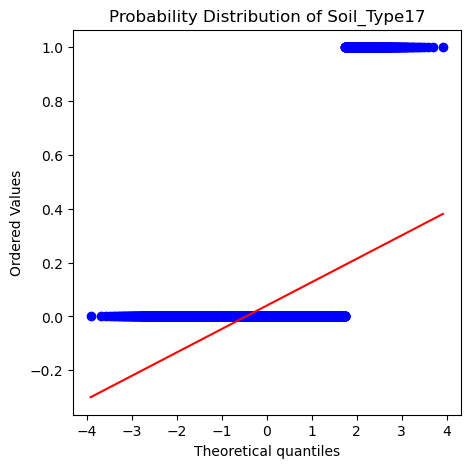

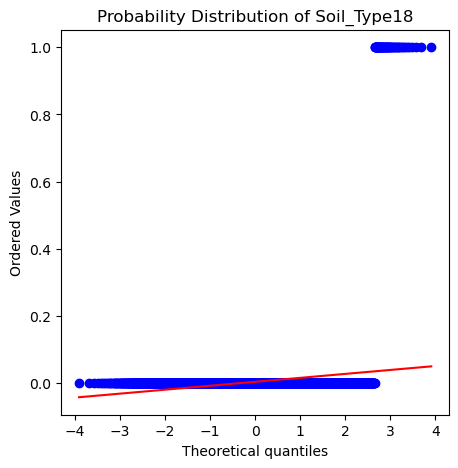

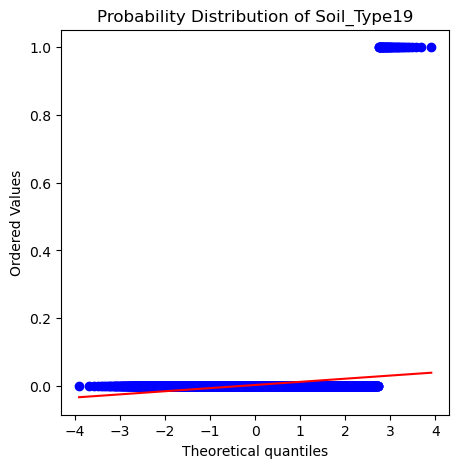

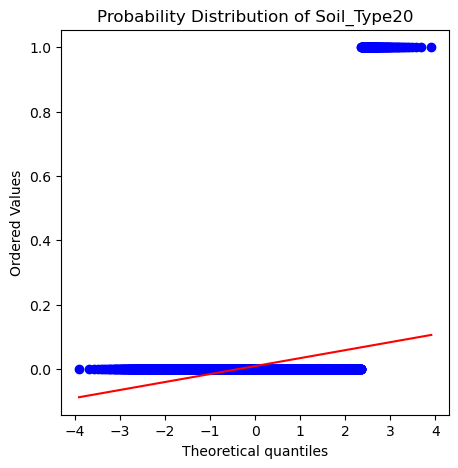

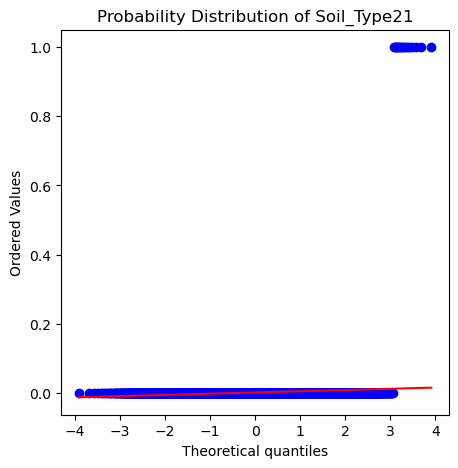

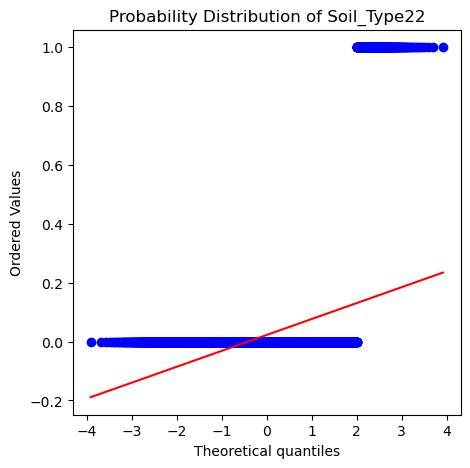

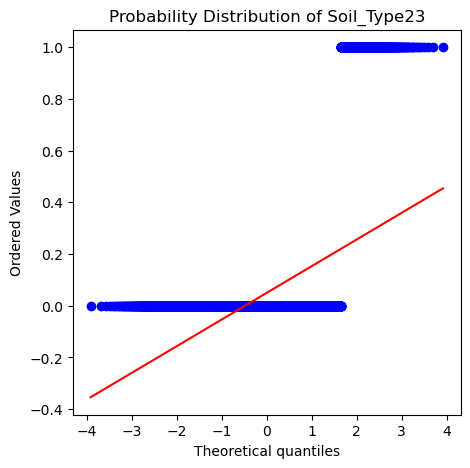

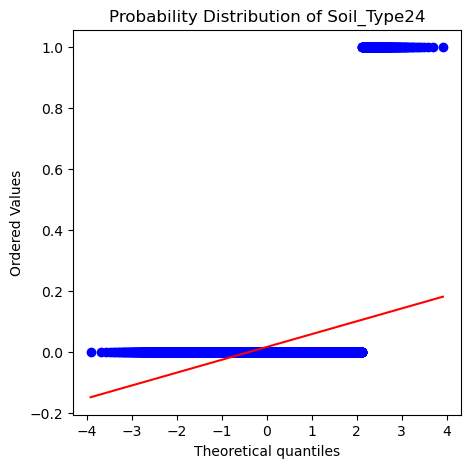

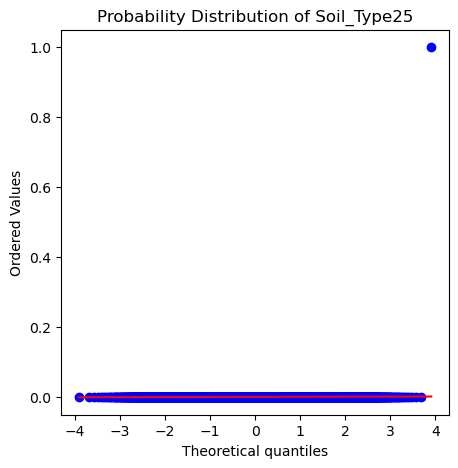

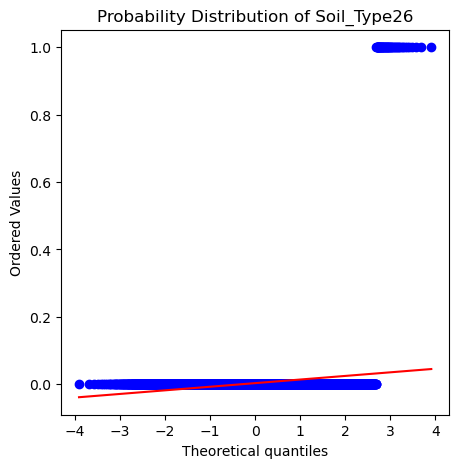

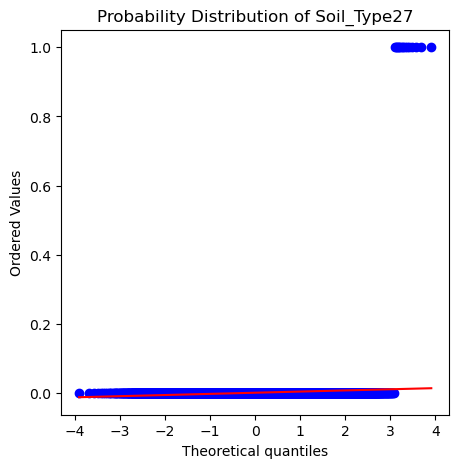

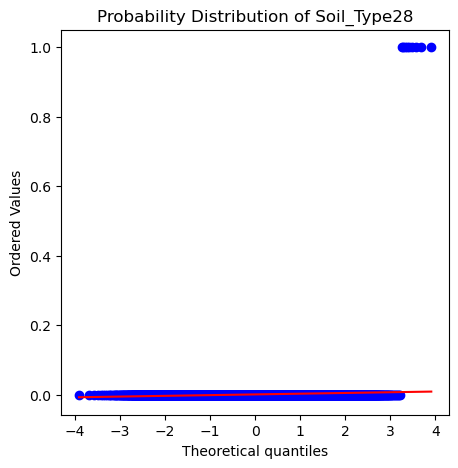

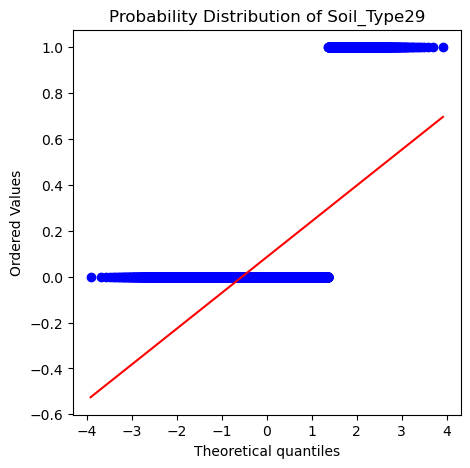

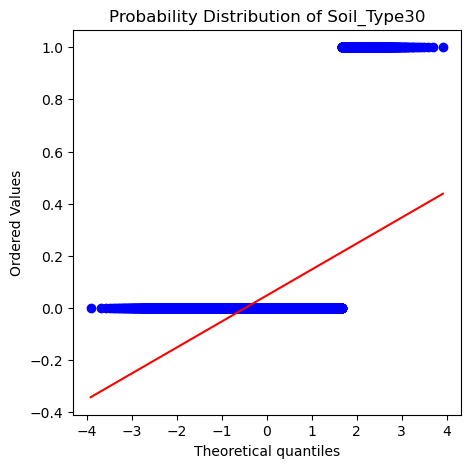

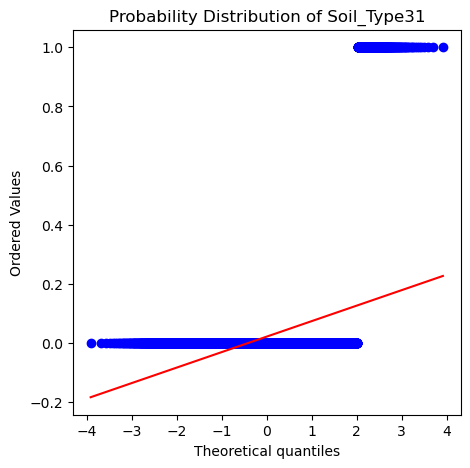

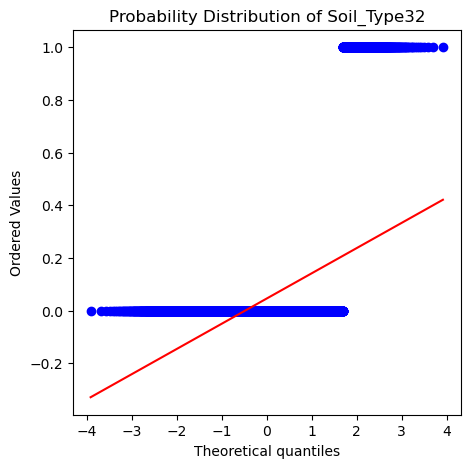

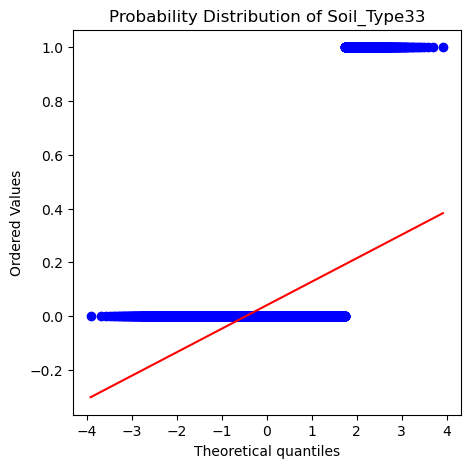

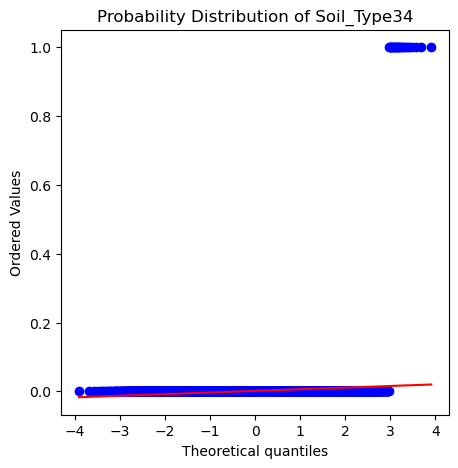

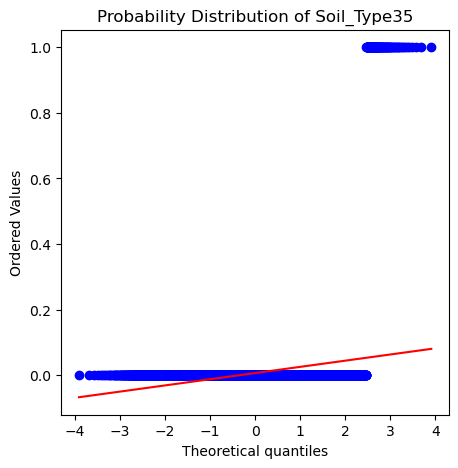

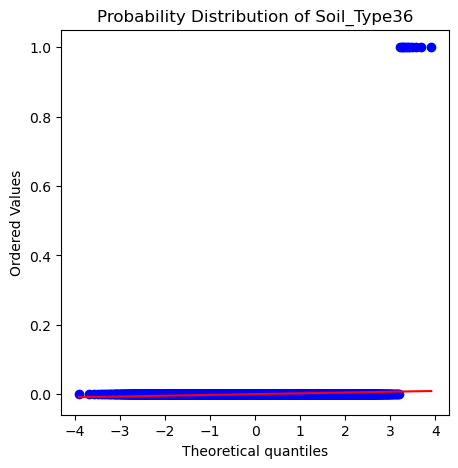

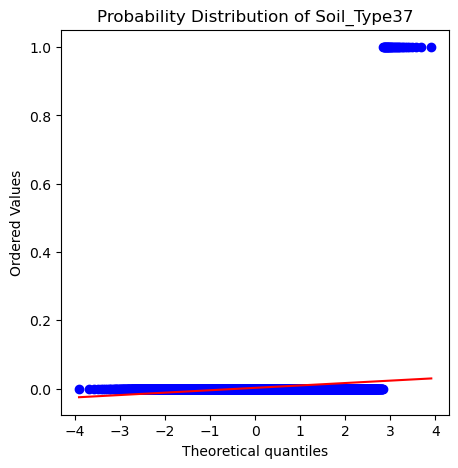

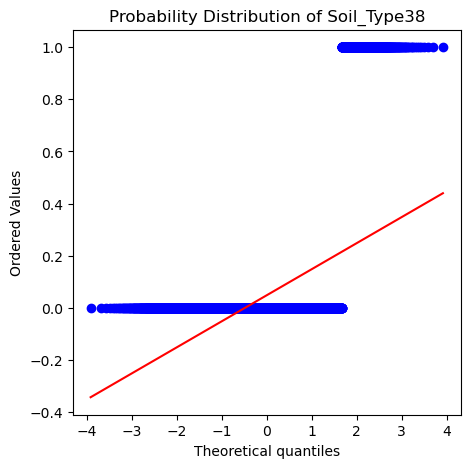

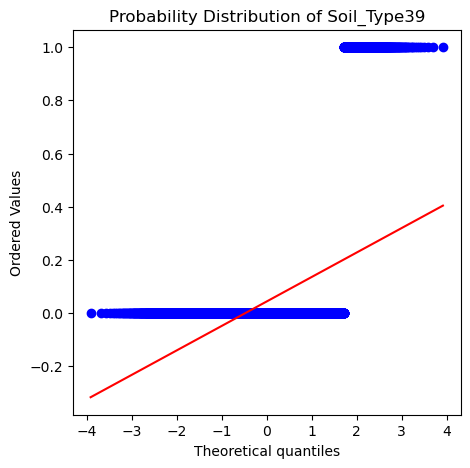

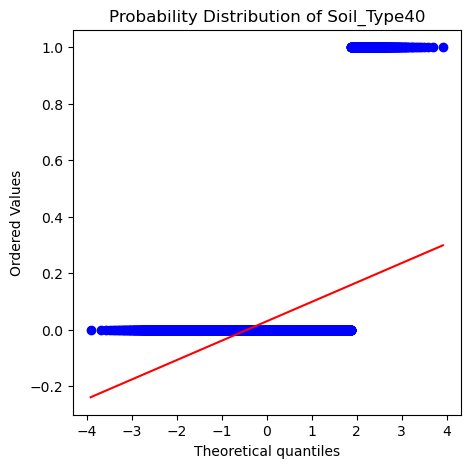

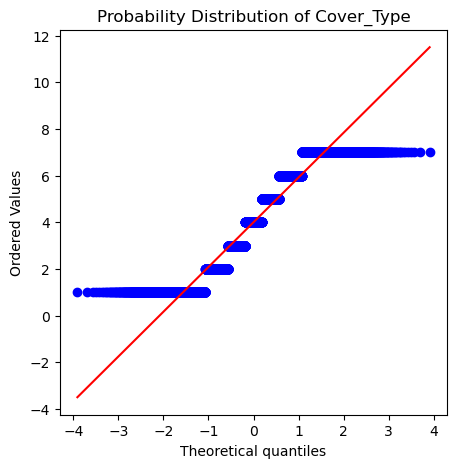

In [16]:
from scipy import stats

numerical_columns = forest_df.select_dtypes(include=['int', 'float']).columns

for column in numerical_columns:
    # Calculate the probability distribution
    probability_distribution = forest_df[column].value_counts(normalize=True)
    
    # Plot the probability distribution using probplot
    plt.figure(figsize=(5, 5))
    stats.probplot(forest_df[column], dist="norm", plot=plt)
    plt.title(f'Probability Distribution of {column}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Ordered Values')
    plt.show()

> ### Bivariate Analysis

In [17]:
forest_df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

<Axes: xlabel='Elevation', ylabel='Slope'>

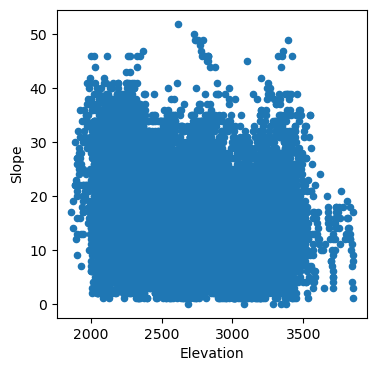

In [18]:
forest_df.plot(kind='scatter', x='Elevation', y='Slope', figsize=(4, 4))

<Axes: xlabel='Horizontal_Distance_To_Hydrology', ylabel='Vertical_Distance_To_Hydrology'>

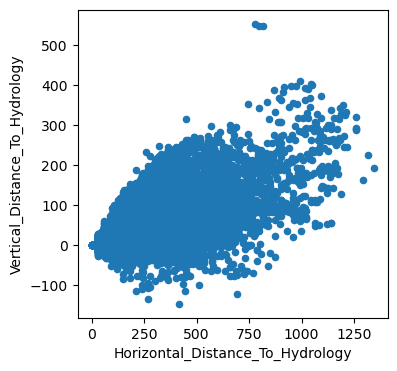

In [19]:
forest_df.plot(kind='scatter', x='Horizontal_Distance_To_Hydrology', y='Vertical_Distance_To_Hydrology', figsize=(4, 4))

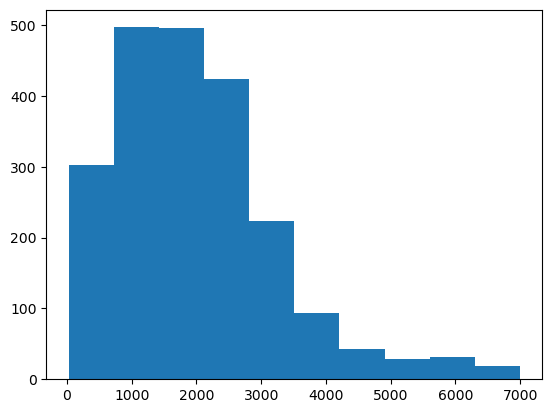

In [20]:
plt.hist(forest_df[forest_df['Cover_Type'] == 1]['Horizontal_Distance_To_Fire_Points'])
plt.show()

# Model Building

## Identifying Inputs and Output

In [21]:
X = forest_df.drop(['Cover_Type'], axis=1)

y = forest_df['Cover_Type']

## Split data into train and test sets

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(12096, 54) (12096,)
(3024, 54) (3024,)


## Data preprocessing on X_train and X_test

In [23]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## Train and Evaluate the model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, f1_score

##### Logistic Regression

In [25]:
lr_model = LogisticRegression(random_state=42)

lr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test_scaled)

lr_accuracy = accuracy_score(y_test, y_pred)
lr_f1_score = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {lr_accuracy}")
print("F1_Score:", lr_f1_score)

Accuracy: 0.7093253968253969
F1_Score: 0.7046845295789202


##### Decision Tree

In [26]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test_scaled)

dt_accuracy = accuracy_score(y_test, y_pred)
dt_f1_score = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {dt_accuracy}")
print("F1_Score:", dt_f1_score)

Accuracy: 0.7886904761904762
F1_Score: 0.787240255940322


##### Random Forest

In [27]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, y_pred)
rf_f1_score = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {rf_accuracy}")
print("F1_Score:", rf_f1_score)

Accuracy: 0.8713624338624338
F1_Score: 0.8694002459671404


##### SVM

In [28]:
svm_model = SVC(random_state=42)

svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, y_pred)
svm_f1_score = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {svm_accuracy}")
print("F1_Score:", svm_f1_score)

Accuracy: 0.7407407407407407
F1_Score: 0.7369095094778335


##### Bagging

In [29]:
bag_model = BaggingClassifier(random_state=42)

bag_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = bag_model.predict(X_test_scaled)

bag_accuracy = accuracy_score(y_test, y_pred)
bag_f1_score = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {bag_accuracy}")
print("F1_Score:", bag_f1_score)

Accuracy: 0.8465608465608465
F1_Score: 0.8439750975138961


##### Gradient Boosting

In [30]:
gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test_scaled)

gb_accuracy = accuracy_score(y_test, y_pred)
gb_f1_score = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {gb_accuracy}")
print("F1_Score:", gb_f1_score)

Accuracy: 0.8025793650793651
F1_Score: 0.7985685473888976


##### ANN

In [31]:
MLPC = MLPClassifier(random_state=42)

MLPC.fit(X_train_scaled,y_train)

# Predict on the test set
y_pred = MLPC.predict(X_test_scaled)

MLPC_accuracy = accuracy_score(y_test, y_pred)
MLPC_f1_score = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {MLPC_accuracy}")
print("F1_Score:", MLPC_f1_score)

Accuracy: 0.8270502645502645
F1_Score: 0.8243299721016045


##### Logistic Regression

Accuracy: 0.7093253968253969

F1_Score: 0.7046845295789202

##### Decision Tree

Accuracy: 0.7886904761904762

F1_Score: 0.787240255940322

##### Random Forest

Accuracy: 0.8713624338624338

F1_Score: 0.8694002459671404

##### SVM

Accuracy: 0.7407407407407407

F1_Score: 0.7369095094778335

##### Bagging

Accuracy: 0.8465608465608465

F1_Score: 0.8439750975138961

##### Gradient Boosting

Accuracy: 0.8025793650793651

F1_Score: 0.7985685473888976

##### ANN

Accuracy: 0.8270502645502645

F1_Score: 0.8243299721016045

# Hyperparameter Tuning

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [33]:
import joblib
from joblib import Memory

import os
import warnings

warnings.filterwarnings('ignore')

In [34]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'random_forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'random_forest': [
        {
            'classifier__n_estimators': [50, 100, 200, 500],
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2, 5, 10]
        }
    ]
}

In [35]:
# Create a scorer with the desired averaging method
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*15, algo, "*"*15)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring=f1_scorer,
                               return_train_score=True,
                               verbose=1
                              )

    # Ensure to have a split dataset
    %time grid_search.fit(X_train_scaled, y_train)

    best_models[algo] = grid_search.best_estimator_
    
    print('Test Score: ', grid_search.score(X_test_scaled, y_test))
    print()

*************** random_forest ***************
Fitting 5 folds for each of 48 candidates, totalling 240 fits
CPU times: total: 30min 55s
Wall time: 40min 47s
Test Score:  0.8715766251086644



In [36]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

random_forest
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(n_estimators=500))])



In [40]:
for name, model in best_models.items():
    print("*" * 15, name, "*" * 15)

    joblib.dump(model, f'{name}.pkl')
    model = joblib.load(f'{name}.pkl')

    %time y_test_pred = model.predict(X_test_scaled)
    
    average_type = 'weighted'
    f1 = metrics.f1_score(y_test, y_test_pred, average=average_type)
    
    print("Test Score (F1, {} average): ".format(average_type), f1)

    print("Model Size: ", os.path.getsize(f'{name}.pkl'), "Bytes")

*************** random_forest ***************
CPU times: total: 359 ms
Wall time: 888 ms
Test Score (F1, weighted average):  0.8715766251086644
Model Size:  242319040 Bytes


# Predicting results on new datapoint using Random Forest Classifier

In [42]:
from joblib import load

# Load the model
model = load('random_forest.pkl')

# Define the datapoint
datapoint = [2595,50,3,258,0,510,220,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,
             0,0,0,0,0]

# Reshape the datapoint to 2D array
datapoint_reshaped = [datapoint]

# Predict the forest cover type
prediction = model.predict(datapoint_reshaped)

print("Forest Cover Type is:", prediction[0])

Forest Cover Type is: 1
